In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 讀取資料
df = pd.read_excel("DATA_Kiss_count_gender_and_IQ.xlsx")
df = df.dropna(subset=['Gender', 'Kiss Count', 'IQ', 'Age of First Kiss'])
df['Gender'] = df['Gender'].str.strip().str.capitalize()
df['Gender_num'] = df['Gender'].map({'Male': 1, 'Female': 0})

sns.set(style="whitegrid")

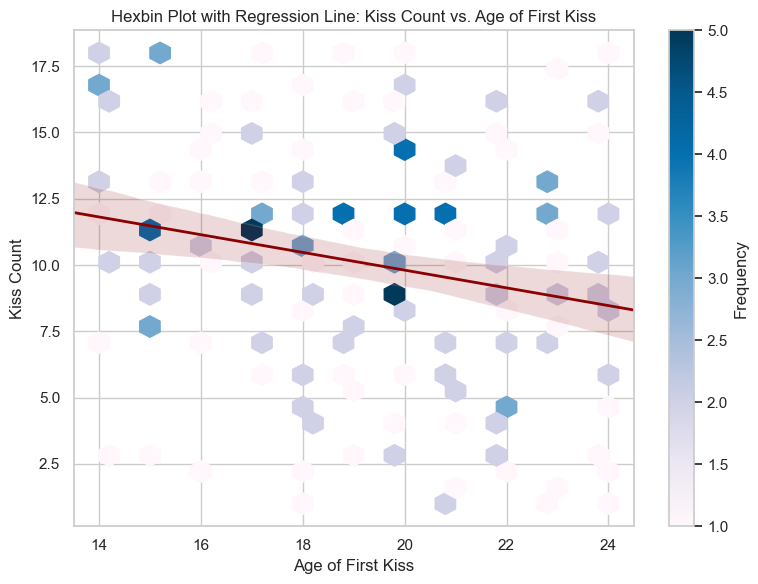

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料
df = pd.read_excel("DATA_Kiss_count_gender_and_IQ.xlsx")

# 預處理
df['Gender'] = df['Gender'].str.strip().str.lower()
df['GenderFlag'] = df['Gender'].apply(lambda x: 1 if x == 'male' else 0)
df = df.dropna(subset=['Kiss Count', 'Age of First Kiss'])

# 繪製 Hexbin Plot + 回歸趨勢線
plt.figure(figsize=(8, 6))

# Hexbin 基礎圖
hb = plt.hexbin(
    x=df["Age of First Kiss"],
    y=df["Kiss Count"],
    gridsize=25,
    cmap="PuBu",
    mincnt=1
)

# 回歸線（不畫點）
sns.regplot(
    x="Age of First Kiss",
    y="Kiss Count",
    data=df,
    scatter=False,
    color="darkred",
    line_kws={"linewidth": 2},
    truncate=False
)

# 標籤與佈局
plt.colorbar(hb, label='Frequency')
plt.title("Hexbin Plot with Regression Line: Kiss Count vs. Age of First Kiss")
plt.xlabel("Age of First Kiss")
plt.ylabel("Kiss Count")
plt.grid(True)
plt.tight_layout()
plt.savefig("kiss_age.png")
plt.show()
